# The Lotka-Volterra model
This model is a python translation of the LV_pz model proposed in Glover et al. (2011), Sec. 9.3

You will need to make sure the required modules below are installed in your python environment

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

This is the function containing the right hand side of the ODE system

In [24]:
def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2)
    dX2dt = X2 * (p3*p2*X1 - p4)
    return np.array([dX1dt,dX2dt])

## Parameters and initial conditions

In [25]:
# The parameters
p = np.array([0.1,0.4,0.2,0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0,X2_0])

## Time axis

In [26]:
# time units are days
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart,Tend,step)

## Integration using the scipy ODE solver

In [27]:
# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,))

## Plot Fig. 9.3a

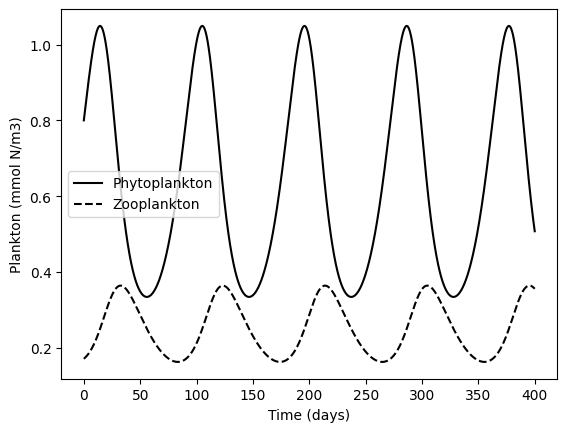

In [28]:
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()

# Exercise 3
1. Write the code to plot Fig. 9.3b, the trajectory in the phase space

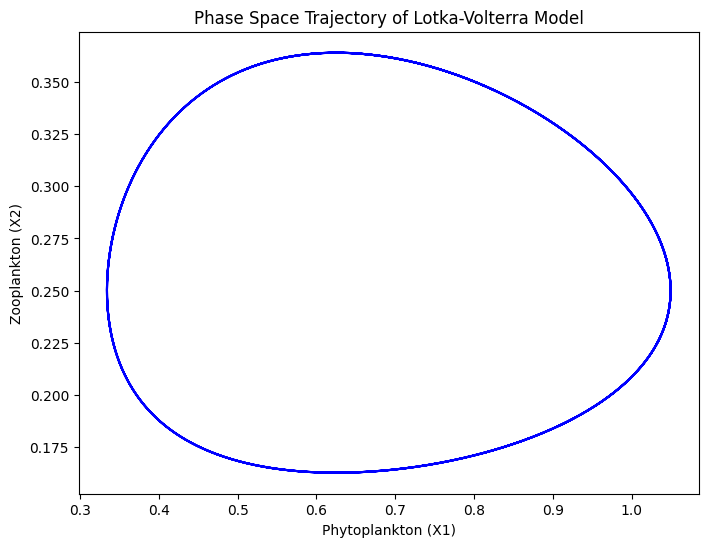

In [11]:
# Exercise 3.1: Plot Fig. 9.3b - trajectory in phase space
plt.figure(figsize=(8, 6))
plt.plot(y[:, 0], y[:, 1], 'b-')
plt.xlabel('Phytoplankton (X1)')
plt.ylabel('Zooplankton (X2)')
plt.title('Phase Space Trajectory of Lotka-Volterra Model')
plt.show()

2. Set the parameter p3=1 and compare how different the trajectory is in the phase space

3. Write the code to compute the solution of the L-V model using the initial conditions given in the caption of Fig. 9.4

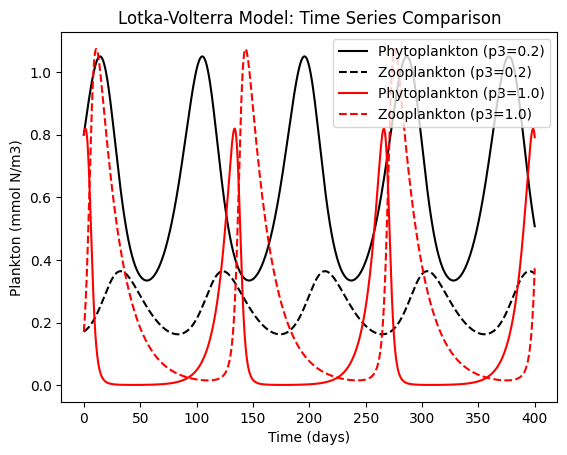

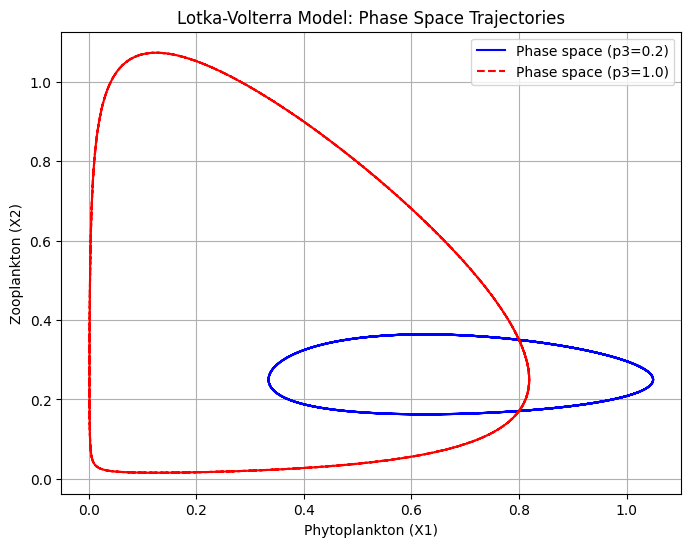

In [29]:
# Lotka-Volterra model function
def LV_pz(x, t, p):
    X1, X2 = x
    p1, p2, p3, p4 = p
    dX1dt = X1 * (p1 - p2 * X2)
    dX2dt = X2 * (p3 * p2 * X1 - p4)
    return np.array([dX1dt, dX2dt])

# Parameters and initial conditions
p_default = np.array([0.1, 0.4, 0.2, 0.05])
p_modified = np.array([0.1, 0.4, 1.0, 0.05])  # p3 set to 1

X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0, X2_0])

# Time axis
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart, Tend, step)

# Integration using scipy ODE solver
y_default = odeint(LV_pz, x0, t, args=(p_default,))
y_modified = odeint(LV_pz, x0, t, args=(p_modified,))

# Plot Fig. 9.3a for default parameters
plt.plot(t, y_default[:, 0], 'k-', label='Phytoplankton (p3=0.2)')
plt.plot(t, y_default[:, 1], 'k--', label='Zooplankton (p3=0.2)')

# Plot Fig. 9.3a for modified p3=1
plt.plot(t, y_modified[:, 0], 'r-', label='Phytoplankton (p3=1.0)')
plt.plot(t, y_modified[:, 1], 'r--', label='Zooplankton (p3=1.0)')

plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.title('Lotka-Volterra Model: Time Series Comparison')
plt.show()

# Plot phase space trajectories for both parameter sets
plt.figure(figsize=(8, 6))
plt.plot(y_default[:, 0], y_default[:, 1], 'b-', label='Phase space (p3=0.2)')
plt.plot(y_modified[:, 0], y_modified[:, 1], 'r--', label='Phase space (p3=1.0)')
plt.xlabel('Phytoplankton (X1)')
plt.ylabel('Zooplankton (X2)')
plt.title('Lotka-Volterra Model: Phase Space Trajectories')
plt.legend()
plt.grid(True)
plt.show()


4. Do you get the same results? Why not? See the errata in the document Glover_etal_2011_ERRATA.pdf to understand more {no need to fully understand the stability analysis ;)}

The differences in the trajectories when changing parameter p3 in the Lotka-Volterra model arise because p3 affects the interaction strength between phytoplankton and zooplankton populations. A higher p3 increases the predation or grazing pressure, altering the dynamics and stability of the system.

Hypotheses for the differences include:
1) Changes in predator-prey interaction strength affect oscillation amplitude and period.
2) Nonlinear feedbacks in the system cause sensitivity to parameter changes.
3) The system may have multiple stable states depending on parameter values.

The document "Glover_etal_2011_ERRATA.pdf" provides detailed explanations and corrections related to these dynamics, clarifying why the model behaves differently under parameter changes.
1) The Lotka-Volterra model assumes no mass conservation because the predator is not fully efficient in converting prey ingestion into growth. Some prey biomass is lost to the environment, which affects the dynamics and stability of the system.
2) Numerical solutions can differ due to truncation and round-off errors inherent in finite difference approximations and numerical integration methods like Euler or Runge-Kutta. These errors accumulate and can cause discrepancies between analytical and numerical results.
3) Stability conditions such as the Courant-Friedrichs-Lewy (CFL) condition must be met to ensure meaningful and stable numerical solutions. Violating these conditions can lead to unstable or divergent solutions.
4) The choice of time step (∆t) and spatial resolution (∆x) affects the accuracy and stability of numerical schemes. Smaller time steps and appropriate grid spacing improve stability but increase computational cost.
5) The errata document clarifies that the parameter p3 in the Lotka-Volterra model influences the predator's efficiency and that changing it alters the phase space trajectories and time series behavior.